Continue to modify figures.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')
plt.style.use('seaborn-paper')
#plt.style.use('seaborn-colorblind')
#plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.transparent'] = True


%matplotlib inline

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Add confidence interval to the prediction
The confidence intervals (95%) are adopted from the test set in `build_models_10.ipynb`.

In [3]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20210825.csv', index_col=0)
predict_df = pd.read_csv('results/predict_20220104.csv', index_col=0)

20220331


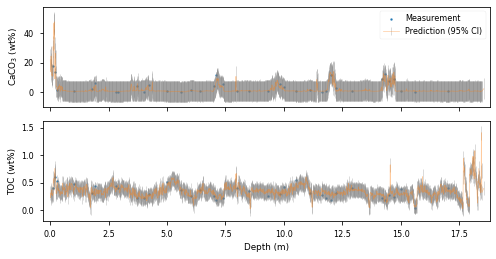

In [23]:
core = 'SO264-64-1'
fig, axes = plt.subplots(2, 1, figsize=(7, 3.7), sharex='col')

X = predict_df[predict_df.core == core]

for ax, measurement, conf_int in zip(axes, ['CaCO3', 'TOC'], [[7.00, 7.04], [0.13, 0.13]]):
    ax.errorbar(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)], 
        yerr = [np.repeat(conf_int[0], len(X)), np.repeat(conf_int[1], len(X))],
        label='Prediction (95% CI)', alpha=.4, ecolor='grey', linewidth=.7, c='C1')

    ax.scatter(
        merge_df.loc[merge_df.core == core, 'mid_depth_mm']*.001, 
        merge_df.loc[merge_df.core == core, '{}%'.format(measurement)], 
        label='Measurement', s=4)

    if measurement == 'CaCO3':
        ax.set_ylabel('CaCO$_3$ (wt%)')
        ax.set_xlim(-.3, 18.8)
        ax.legend()
    else:
        ax.set_ylabel('TOC (wt%)')
        ax.set_xlabel('Depth (m)')

fig.subplots_adjust(hspace=.08)
fig.tight_layout()
fig.savefig('results/prediction_{}_{}.png'.format(core, date))
print(date)

How about just use the case study to show the resolution difference and CI in the same time? Also, use RMSE instead of R2.

20220331


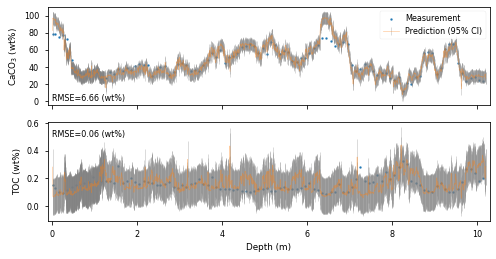

In [36]:
core = 'PS75-056-1'
fig, axes = plt.subplots(2, 1, figsize=(7, 3.7), sharex='col')

X = predict_df[predict_df.core == core]

for ax, measurement, conf_int in zip(axes, ['CaCO3', 'TOC'], [[7.00, 7.04], [0.13, 0.13]]):
    ax.errorbar(
        X['composite_depth_mm']*.001, 
        X['{} prediction (wt%)'.format(measurement)], 
        yerr = [np.repeat(conf_int[0], len(X)), np.repeat(conf_int[1], len(X))],
        label='Prediction (95% CI)', alpha=.4, ecolor='grey', linewidth=.7, c='C1')

    ax.scatter(
        merge_df.loc[merge_df.core == core, 'mid_depth_mm']*.001, 
        merge_df.loc[merge_df.core == core, '{}%'.format(measurement)], 
        label='Measurement', s=4)

    if measurement == 'CaCO3':
        ax.set_ylabel('CaCO$_3$ (wt%)')
        ax.set_xlim(-.1, 10.3)
        ax.text(0, 0, 'RMSE=6.66 (wt%)', fontsize=8)
        ax.legend()
    else:
        ax.set_ylabel('TOC (wt%)')
        ax.set_xlabel('Depth (m)')
        ax.text(0, .5, 'RMSE=0.06 (wt%)', fontsize=8)

fig.subplots_adjust(hspace=.08)
fig.tight_layout()
fig.savefig('results/prediction_{}_{}.png'.format(core, date))
print(date)

# Put figures together

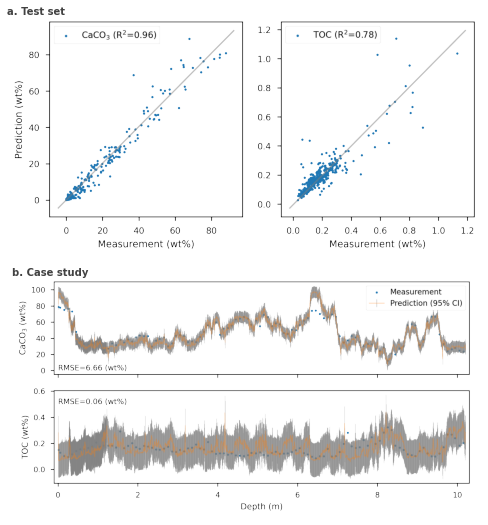

In [51]:
imgs = [plt.imread('results/performance_dev_20220209.png'), plt.imread('results/prediction_PS75-056-1_20220331.png')]

# the size is sum from the size of these two figures
fig, axes = plt.subplots(2, 1, figsize=(7, 7.4))
for ax, img, cap in zip(axes, imgs, ['a. Test set', 'b. Case study']):
    ax.axis('off')
    ax.imshow(img)
    ax.text(0, 1, cap, weight='bold', c='#424242')

#fig.subplots_adjust(hspace=.01)
fig.tight_layout()
fig.savefig('results/join_figure_0_{}.png'.format(date))
